## Data Extraction

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime, timedelta
import math

import yfinance as yf

In [ ]:
# For the Exploratory Data Analysis (EDA), we will focus on Apple and Nvidia stocks
stocks_list = ['AAPL','NVDA']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in stocks_list:
  globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, NVDA]
company_name = ["Apple", "NVIDA"]

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,company_name,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,,,,,,,,
2024-10-15 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NVIDA,131.600006,131.600006,138.570007,128.740005,137.869995,377831000.0
2024-10-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NVIDA,135.720001,135.720001,136.619995,131.580002,133.979996,264879700.0
2024-10-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NVIDA,136.929993,136.929993,140.889999,136.869995,139.339996,306435900.0
2024-10-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NVIDA,138.000000,138.000000,138.899994,137.279999,138.669998,176090200.0
2024-10-21 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NVIDA,143.710007,143.710007,143.710007,138.000000,138.130005,264554500.0
2024-10-22 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NVIDA,143.589996,143.589996,144.419998,141.779999,142.910004,226311600.0
2024-10-23 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NVIDA,139.559998,139.559998,142.429993,137.460007,142.029999,285930000.0
2024-10-24 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NVIDA,140.410004,140.410004,141.350006,138.460007,140.820007,172354900.0


## Data Exploration and Discovery

In [ ]:
# Summary statistics
NVDA.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,61.553449,61.566236,62.681481,60.308821,61.539174,4.477522e+08
std,38.149243,38.147450,38.943115,37.312915,38.218425,1.579633e+08
min,13.206923,13.219000,13.781000,12.956000,13.043000,1.679340e+08
25%,27.951347,27.965000,28.367001,27.472000,27.840000,3.529940e+08
50%,46.755852,46.770000,47.530998,46.027000,46.667999,4.246630e+08
75%,90.538818,90.554001,91.959999,89.055000,90.405998,5.122080e+08
max,143.710007,143.710007,144.419998,141.779999,143.000000,1.543911e+09


In [ ]:
# First 5 rows
NVDA.head(5)

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,,
2022-10-31 00:00:00+00:00,13.484670,13.497,13.838,13.297,13.778,486341000,NVIDA
2022-11-01 00:00:00+00:00,13.530628,13.543,13.925,13.519,13.811,432817000,NVIDA
2022-11-02 00:00:00+00:00,13.206923,13.219,14.210,13.211,13.850,672628000,NVIDA
2022-11-03 00:00:00+00:00,13.408738,13.421,13.781,12.956,13.043,500065000,NVIDA
2022-11-04 00:00:00+00:00,14.143066,14.156,14.229,13.697,13.986,612576000,NVIDA


In [ ]:
# General info
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-10-31 00:00:00+00:00 to 2024-10-28 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  501 non-null    float64
 1   (Close, NVDA)      501 non-null    float64
 2   (High, NVDA)       501 non-null    float64
 3   (Low, NVDA)        501 non-null    float64
 4   (Open, NVDA)       501 non-null    float64
 5   (Volume, NVDA)     501 non-null    int64  
 6   (company_name, )   501 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.3+ KB


In [ ]:
# Check for missing values
df.isna().sum()

,,0
Price,Ticker,
Adj Close,AAPL,501
Close,AAPL,501
High,AAPL,501
Low,AAPL,501
Open,AAPL,501
Volume,AAPL,501
company_name,,0
Adj Close,NVDA,501
Close,NVDA,501


### Time Series Visualization

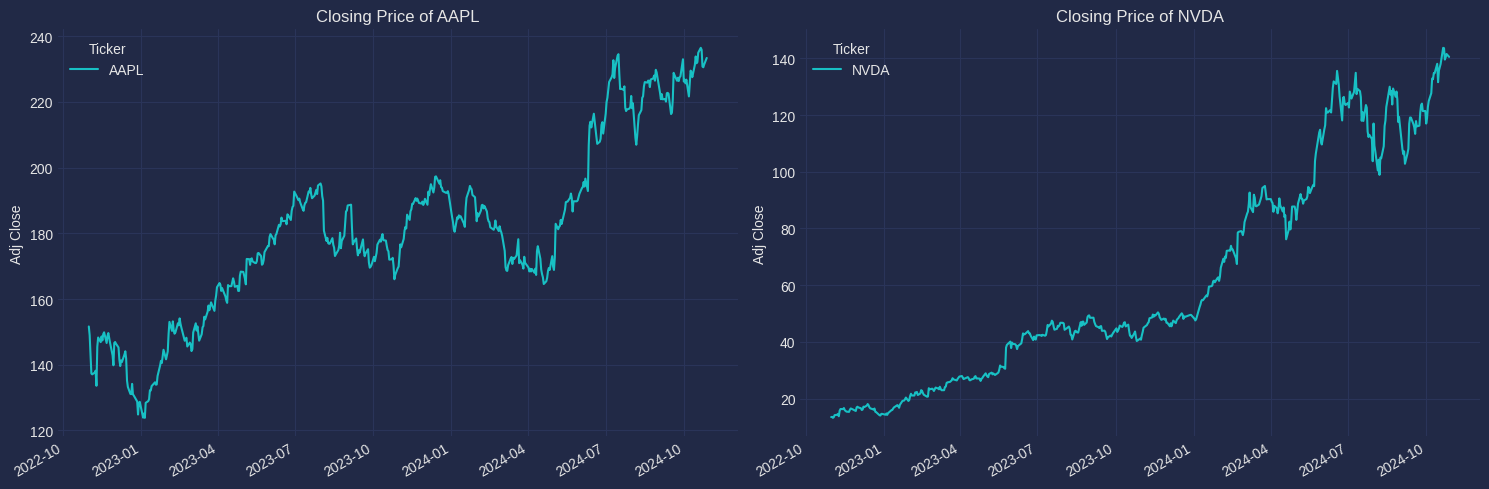

In [ ]:
# Historical view of the closing price

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the list of companies and create subplots
for i, company in enumerate(company_list[:2]):  # Limit to the first 2 companies
  ax = axes[i]
  ax.clear()  # Clear the axis to avoid overlap
  company['Adj Close'].plot(ax=ax)
  ax.set_ylabel('Adj Close')
  ax.set_xlabel(None)
  ax.set_title(f"Closing Price of {stocks_list[i]}")
  ax.grid(True)

# Adjust subplot parameters to give specified padding
plt.tight_layout()

# Show the plot
plt.show()

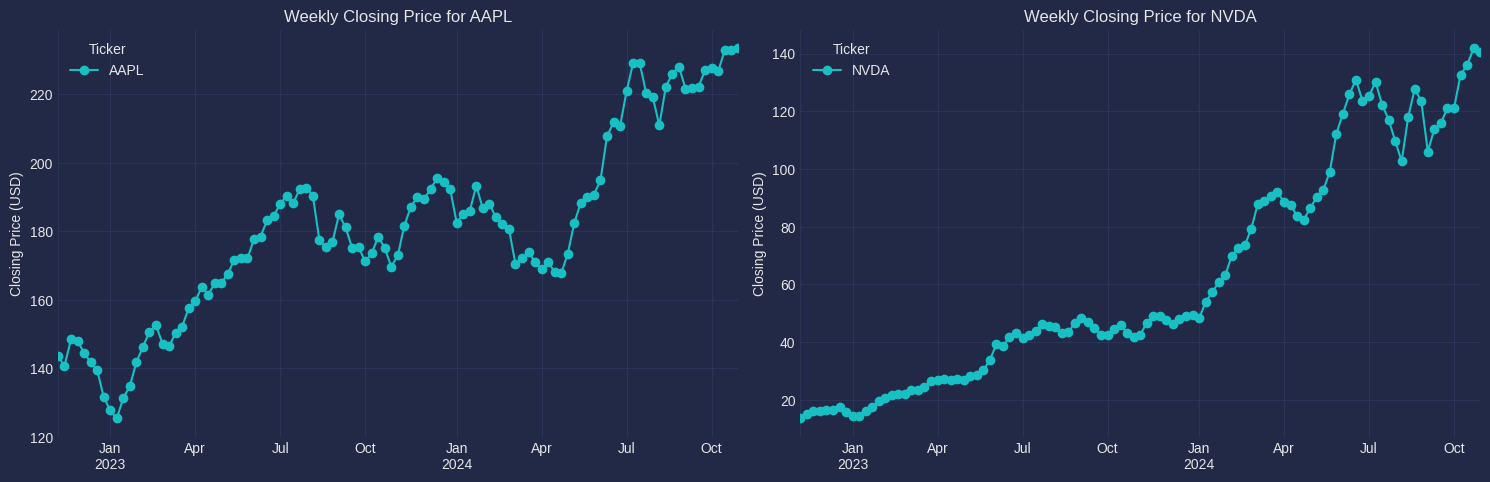

In [ ]:
# Plot the closing price for each week

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the list of companies and create subplots
for i, company in enumerate(company_list[:2]):  # Limit to the first 2 companies
  ax = axes[i]
  ax.clear()  # Clear the axis to avoid overlap
  weekly_data = company['Adj Close'].resample('W').mean()  # Resample the data to get weekly averages
  weekly_data.plot(ax=ax, marker='o', linestyle='-')
  ax.set_title(f'Weekly Closing Price for {stocks_list[i]}')
  ax.set_xlabel(None)
  ax.set_ylabel('Closing Price (USD)')
  ax.grid(True)

# Adjust subplot parameters to give specified padding
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Plot Candlestick chart for Apple stock price to illustrate price fluctuations

fig = go.Figure(data=[go.Candlestick(x=AAPL.index,
                open=AAPL['Open'],
                high=AAPL['High'],
                low=AAPL['Low'],
                close=AAPL['Close'])])

fig.update_layout(title='Apple Stock Price Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Stock Price (USD)')

fig.update_layout(template='plotly_dark')

fig.show()

In [ ]:
# Plot Candlestick chart for Nvidia stock price to illustrate price fluctuations

fig = go.Figure(data=[go.Candlestick(x=NVDA.index,
                open=NVDA['Open'],
                high=NVDA['High'],
                low=NVDA['Low'],
                close=NVDA['Close'])])

fig.update_layout(title='Nvidia Stock Price Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Stock Price (USD)')

fig.update_layout(template='plotly_dark')

fig.show()

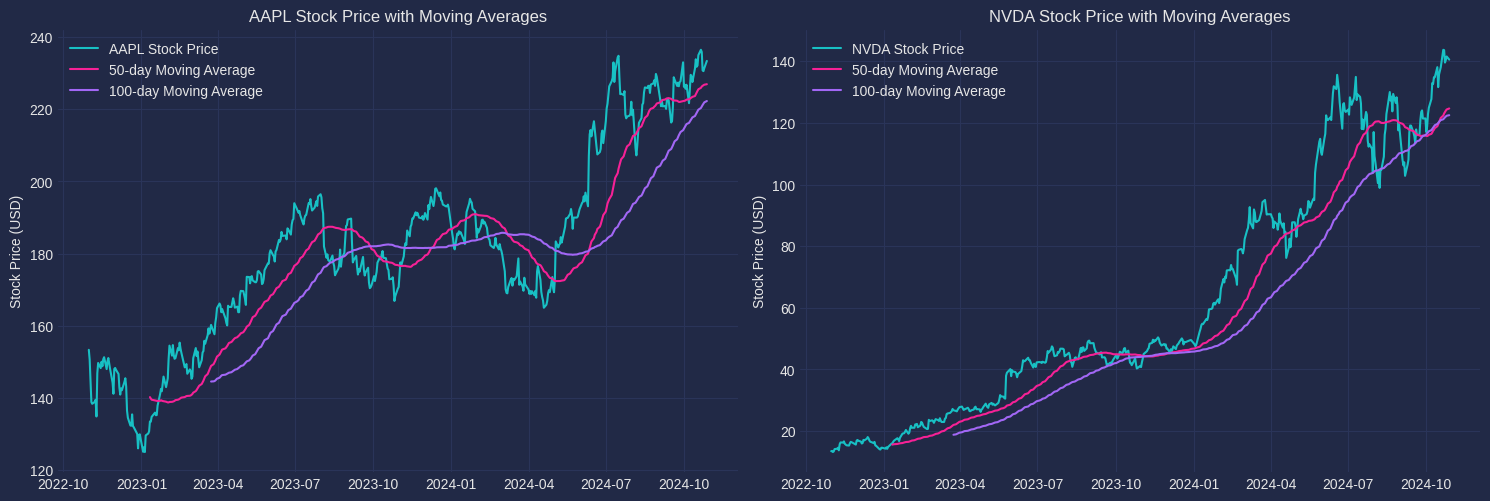

In [ ]:
# Calculate and plot the Moving Average for each stock
# Moving Average: constantly updated average used to reduce noise on a price chart and provide insights into the overall price direction.
# An upward angle indicates an overall upward price movement, while a downward angle suggests a downward trend.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    company['MA50'] = company['Close'].rolling(window=50).mean()
    company['MA100'] = company['Close'].rolling(window=100).mean()

    plt.plot(company['Close'], label=f'{stocks_list[i - 1]} Stock Price')
    plt.plot(company['MA50'], label='50-day Moving Average')
    plt.plot(company['MA100'], label='100-day Moving Average')
    plt.title(f'{stocks_list[i - 1]} Stock Price with Moving Averages')
    plt.xlabel(None)
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

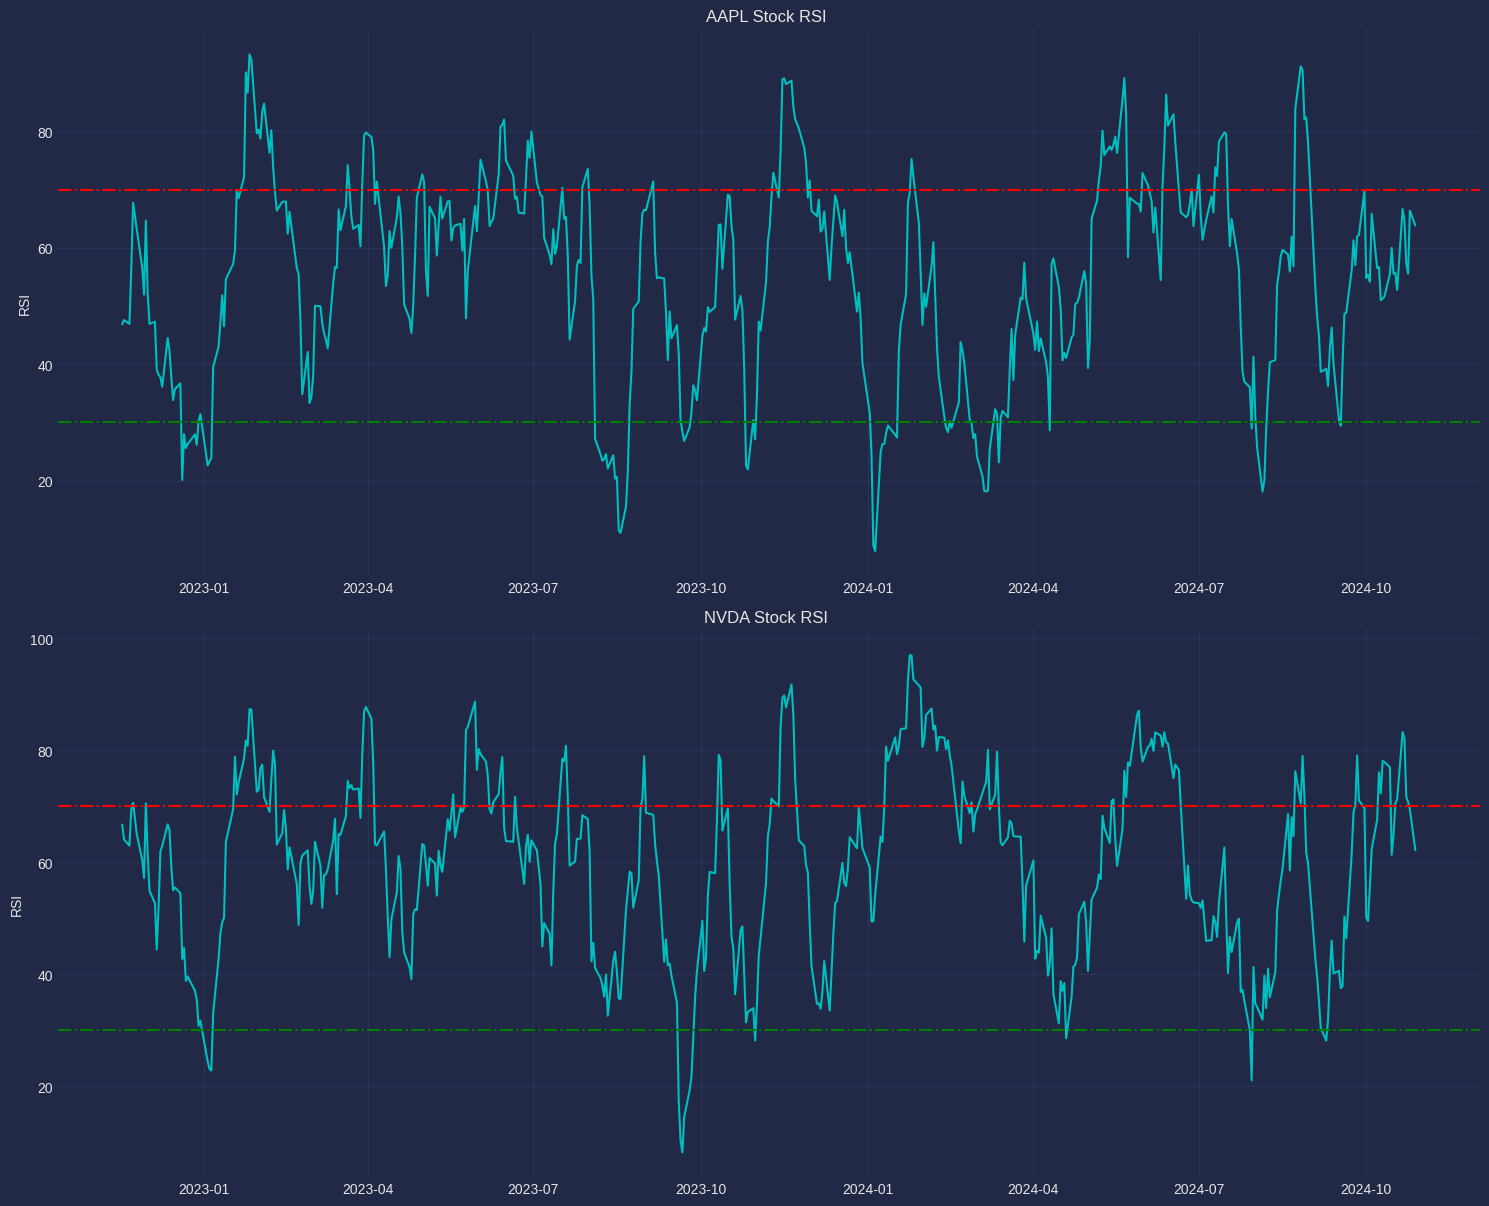

In [ ]:
# Calculate and plot the Relative Strength Index (RSI) for each stock
# RSI: momentum indicator used to determine whether a security is overvalued or undervalued based on recent price changes.
# Readings above 70 indicating overbought conditions and readings below 30 indicating oversold conditions.

plt.figure(figsize=(15, 24))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)

    # Calculate daily price change
    company['Daily Change'] = company['Close'].diff()

    # the lookback period for RSI
    period = 14    # a lookback period of 14 is a common choice for calculating the RSI

    # Calculate the average gain and average loss
    company['Gain'] = company['Daily Change'].apply(lambda x: x if x > 0 else 0)
    company['Loss'] = company['Daily Change'].apply(lambda x: -x if x< 0 else 0)
    company['Average Gain'] = company['Gain'].rolling(window=period).mean()
    company['Average Loss'] = company['Loss'].rolling(window=period).mean()

    # Calculate the relative strength  (RS)
    company['RS'] = company['Average Gain'] / company['Average Loss']

    # Calculate the RSI
    company['RSI'] = 100 - (100 / (1 + company['RS']))

    # Plotting the RSI
    plt.plot(company.index, company['RSI'], label=f'{stocks_list[i - 1]} RSI', color='c')
    plt.axhline(y=70, color='r', linestyle='dashdot')
    plt.axhline(y=30, color='g', linestyle='dashdot')
    plt.title(f'{stocks_list[i - 1]} Stock RSI ')
    plt.xlabel(None)
    plt.ylabel('RSI')

plt.tight_layout()
plt.show()

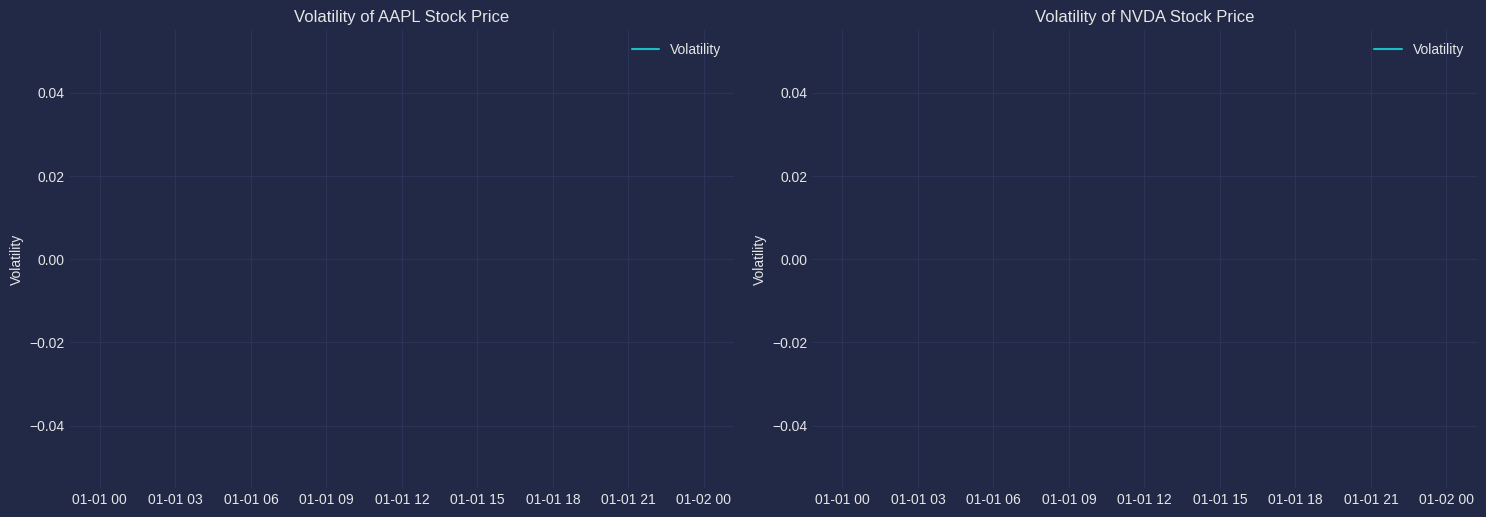

In [ ]:
# Plot a short-term volatility chart for each stock
# Volatility: measure of price fluctuation using the speed and magnitude of price movements to indicate how much a stock or market index can change.
# Higher volatility implies greater risk, as prices may experience significant swings.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volatility'] = company['Close'].pct_change().rolling(window=20).std()
    plt.plot(company['Volatility'], label='Volatility')
    plt.title(f'Volatility of {stocks_list[i - 1]} Stock Price')
    plt.xlabel(None)
    plt.ylabel('Volatility')
    plt.grid(True)
    plt.legend()


plt.tight_layout()
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

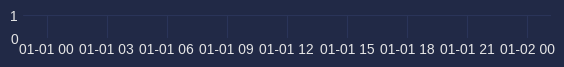

In [ ]:
# Plot trading volume over time for each stock
# Trading volume: the number of shares or contracts traded for a specific security for a specific time period.
# Conveys valuable information about investors' sentiments regarding a market or security.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.bar(company.index, company['Volume'], color='c', alpha=0.5)
    plt.title(f'{stocks_list[i - 1]} Stock Trading Volume Over Time ')
    plt.xlabel(None)
    plt.ylabel('Volume')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis with S&P 500
# Determines how much the overall state of the market influences a particular stock. High positive correlation indicates sensitivity to overall market trends.

# Download S&P 500 data
sp500_data = yf.download('^GSPC', start=start, end=end)

# Create a DataFrame to store correlation values
correlation_data = []

for i, company in enumerate(company_list, 1):
    correlation = company['Close'].corr(sp500_data['Close'])
    correlation_data.append({'Company': stocks_list[i - 1], 'Correlation': correlation})
    print(f"'Company : {stocks_list[i - 1]} Correlation: {correlation}")

In [ ]:
# Heatmap
# A positive correlation indicates that the stock moves in the same direction as the S&P 500, whereas a negative correlation indicates the opposite.

correlation_df = pd.DataFrame(correlation_data)
heatmap_data = correlation_df.pivot_table(index='Company', columns='Company', values='Correlation', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='Blues_r', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with S&P 500')
plt.show()

### Performance Analysis

In [ ]:
# Sharpe Ratio: assess the relationship between an investment's return and its risk by comparing the excess return of an investment
# to a benchmark with the volatility of those returns. A higher Sharpe ratio indicates better risk-adjusted performance.

sharpe_ratios = []
stock_names = []

# Calculate Sharpe Ratio for each company
for i, company in enumerate(company_list, 1):
    company['Daily Returns'] = company['Close'].pct_change()
    sharpe_ratio = np.sqrt(252) * (company['Daily Returns'].mean() / company['Daily Returns'].std())
    print(f"Sharpe Ratio for {stocks_list[i - 1]}: {sharpe_ratio}")
    sharpe_ratios.append(sharpe_ratio)
    stock_names.append(stocks_list[i - 1])

In [ ]:
plt.barh(stock_names, sharpe_ratios, color='c')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Stocks')
plt.title('Sharpe Ratio for Each Stock')
plt.show()